<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understanding Business Problem

Our business case is to predict customer charges for an insurance company based on given variables. So that the company can decide how much they charge people correctly.

# 2. Variable Description

After understanding the business case, we need to know our variables before analyzing them. Thus we have a clear understanding as we go further.

I passed the gathering data step since we already have ready to use data from Kaggle :)

Age: Age of the primary beneficiary
Sex: Insurance contractor gender, female, male
BMI: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height,
an objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
Children: Number of children covered by health insurance / Number of dependents
Smoker: Smoking
Region: the beneficiary’s residential area in the US, northeast, southeast, southwest and northwest.
Charges: Individual medical costs billed by health insurance

# 3. Data Understanding

Now we understood our business case and imported the data we need in CSV format. The next step is importing the necessary libraries. I almost every time use Jupyter Notebook for my analysis.



In [3]:
import numpy as np
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
df.sex.unique()

array(['female', 'male'], dtype=object)

# 4. Data Cleaning

In this part of the EDA. We will check ;

Missing Values

Duplicated Values

The purpose of data cleaning is to get our data ready to analyze and visualize.

In [11]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
df[df.duplicated]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
df.drop_duplicates(keep = 'first', inplace = True)

# 5. Data visualization

A picture is worth a thousand words

Now, We understood our dataset in general and checked the missing values. We also deleted duplicated values from the data frame.

The next part of this journey is data visualization! Our goal is to perform univariate, bivariate and multivariate analysis to see the distribution and relationship between variables.

We will use the seaborn library for statistical data visualization. Seaborn is a data visualization library based on matplotlib and my favorite with ease of use.

5.1 Univariate Analysis
The purpose of the univariate analysis is to understand the distribution of values for a single variable.

We can perform univariate analysis with 3 options :

Summary Statistics
Frequency Distributions Table
Charts ( Boxplot, Histogram, Barplot, Pie Chart)
We will perform univariate analysis by using visualization techniques.

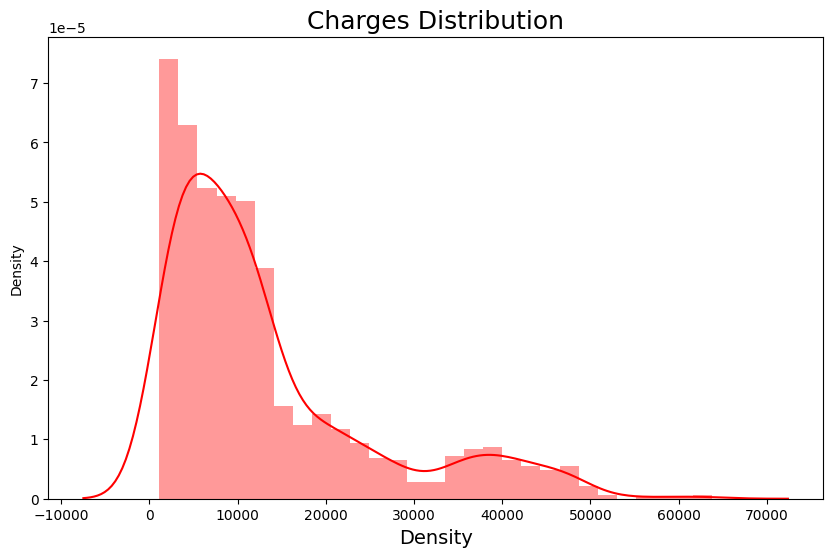

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.xlabel('Density',size=14)
plt.show()

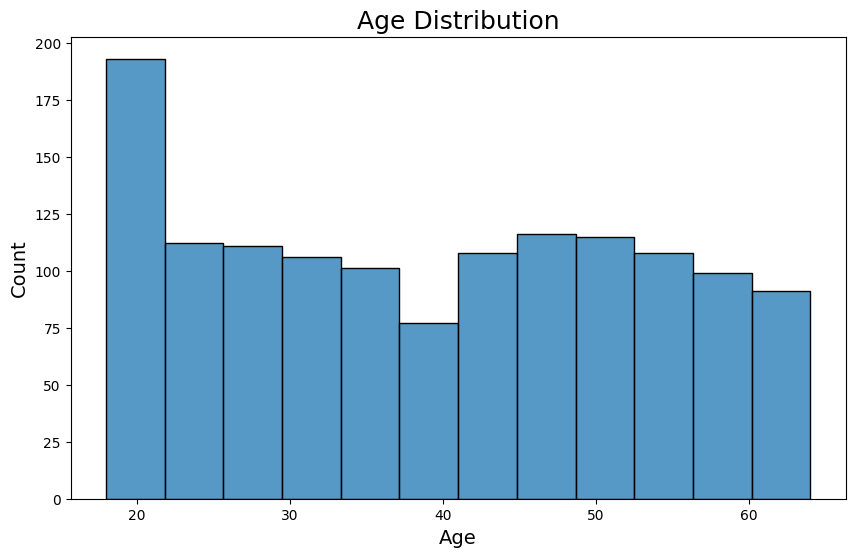

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

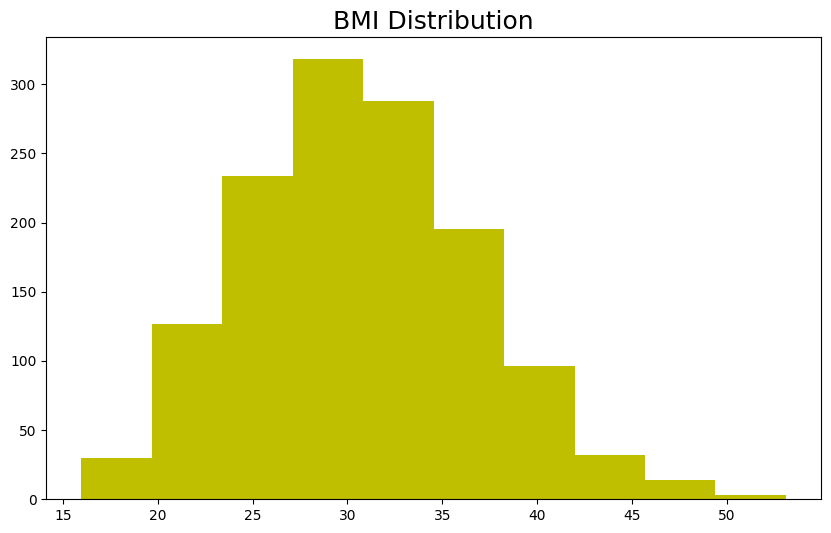

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()

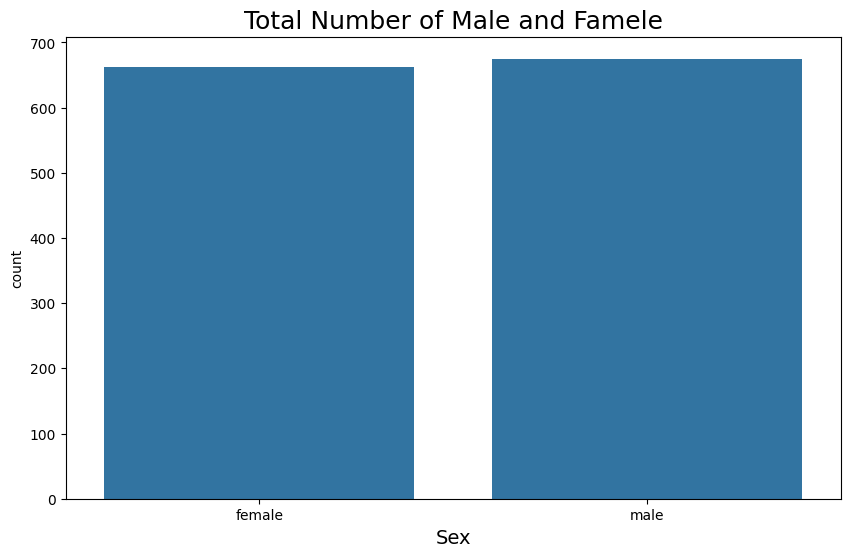

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Famele',size=18)
plt.xlabel('Sex',size=14)
plt.show()

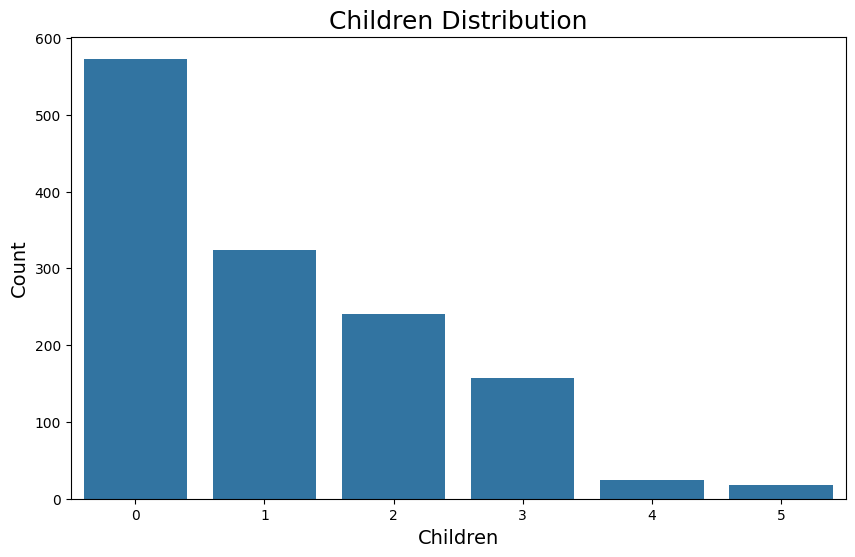

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

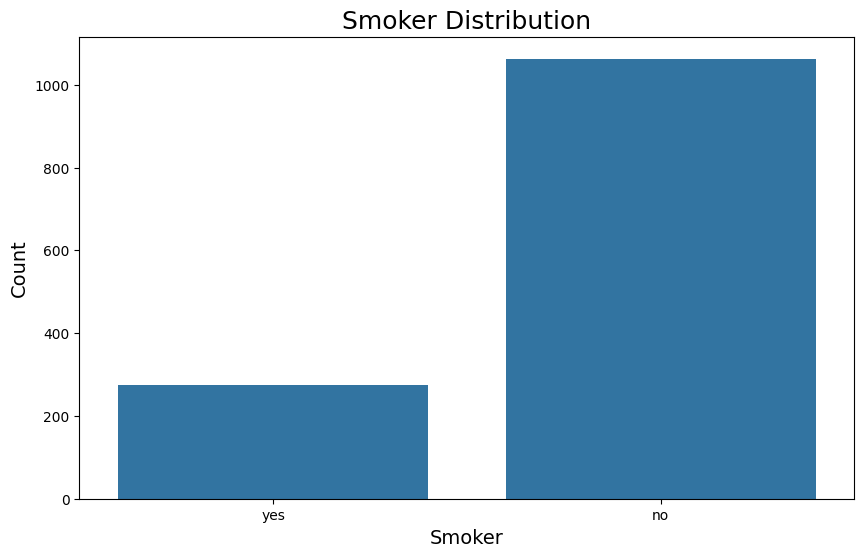

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [20]:
df.smoker.value_counts()

,count
smoker,
no,1063
yes,274


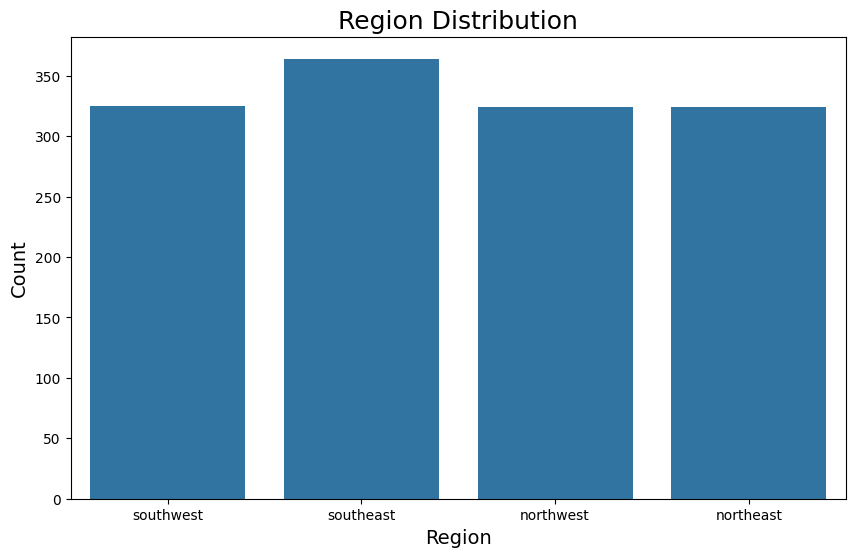

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()

5.2 Bivariate Analysis
Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.

For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

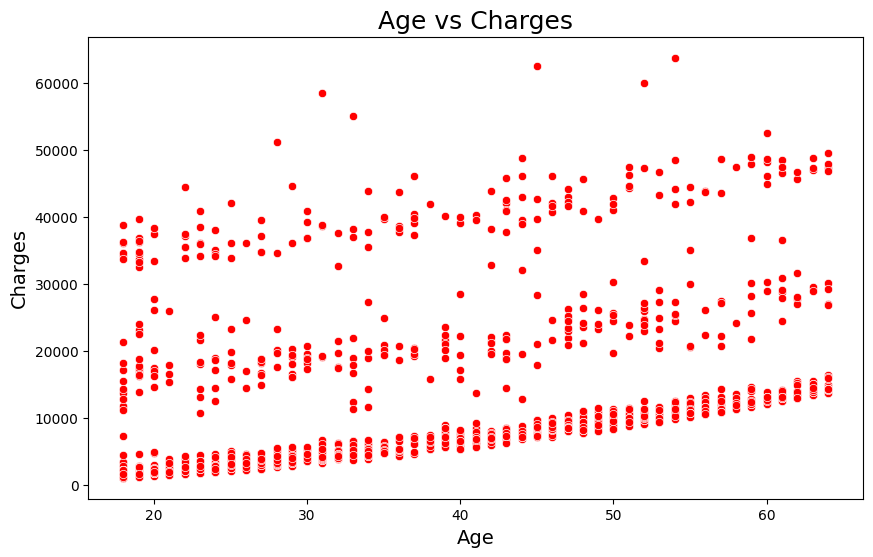

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x ='age',y='charges',color='r',data = df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

Text(0.5, 1.0, 'Smoker vs Charges')

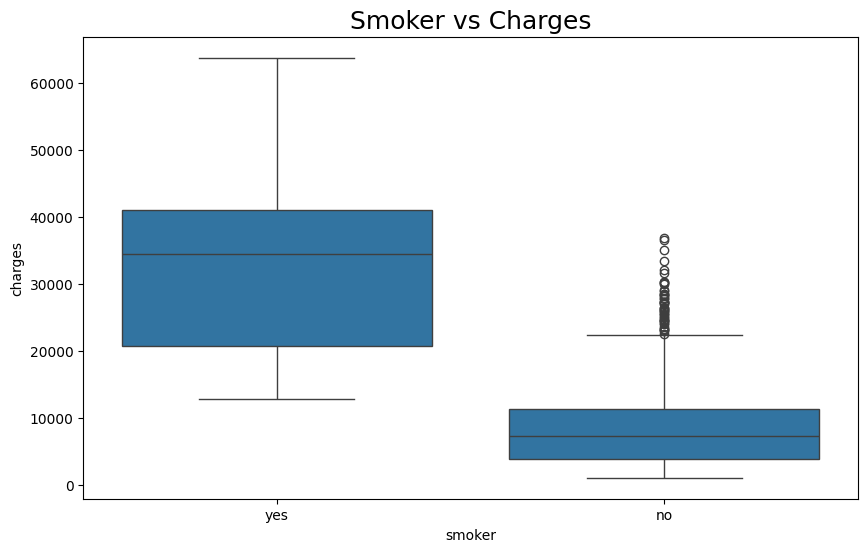

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18)

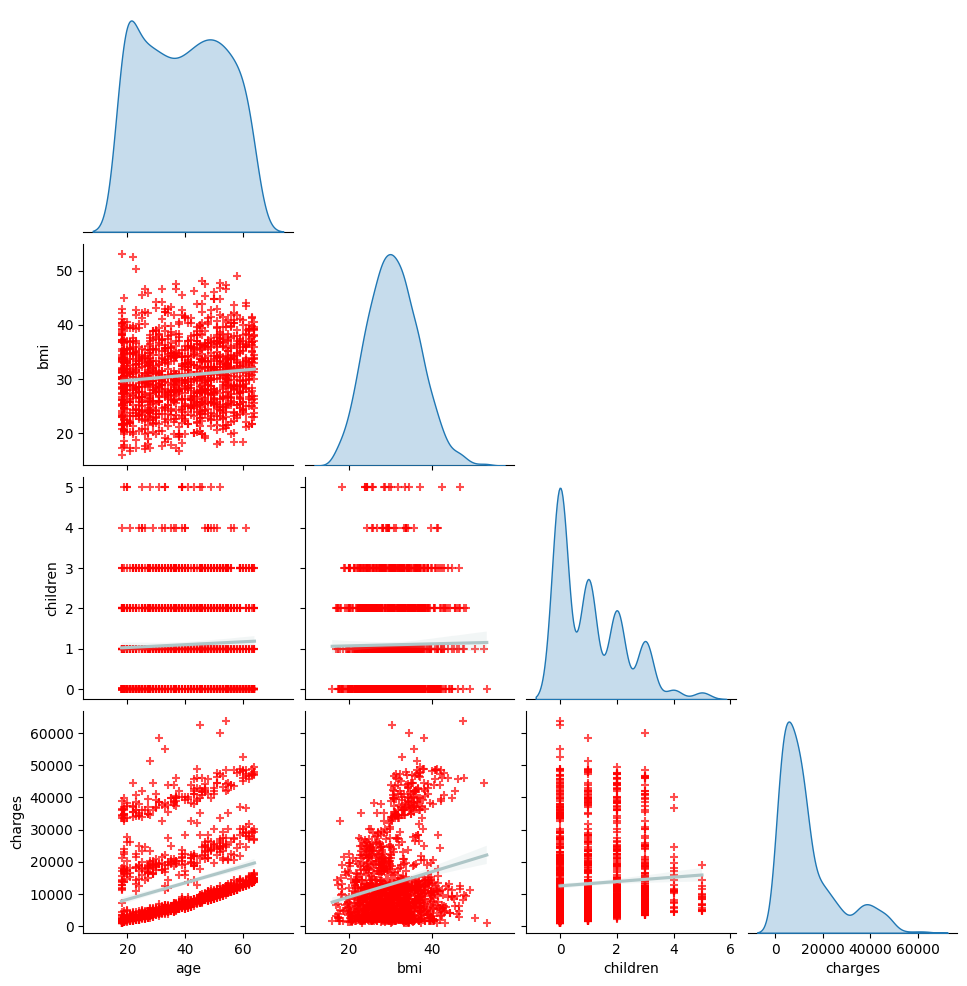

In [24]:
sns.pairplot(df,
                  markers="+", # Changed 'markes' to 'markers'
                  diag_kind="kde",
                  kind='reg',
                  plot_kws={'line_kws':{'color':'#aec6c7'},
                            'scatter_kws': {'alpha':0.7,
                                            'color':'red'}},
                  corner=True);

5.3 Multivariate Analysis
Correlation


Correlation is used to test relationships between quantitative variables or categorical variables. It’s a measure of how things are related. The table above shows us how we can interpret correlation coefficients.

As we said earlier, seaborn is an awesome library that helps us visualize our variables easily and clearly. The heatmap() method shows us the relationship between numeric variables.

We will combine the .corr() method with heatmap so that we will be able to see the relationship in the graph. .corr() method is used Pearson correlation by default.

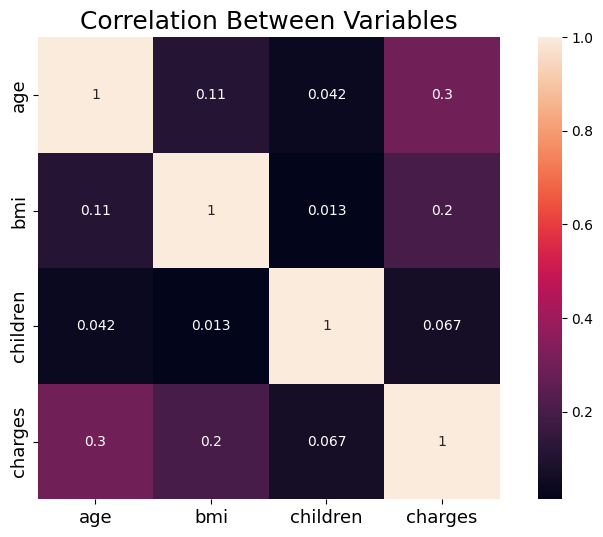

In [27]:
plt.figure(figsize=(10,6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, square=True)
plt.title('Correlation Between Variables', size=18)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()